Example1 :

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load data and read Las file
las =lasio.read('/content/drive/My Drive/Dataset/15-9-19_SR_COMP.LAS')

In [6]:
df = las.df()

In [7]:
df['DEPTH'] = df.index

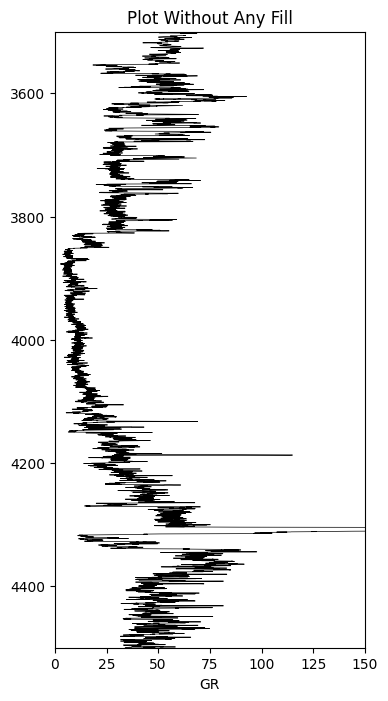

In [8]:
df.plot(x='GR', y='DEPTH', c='black', lw=0.5, legend=False, figsize=(4,8))
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot Without Any Fill')
plt.show()

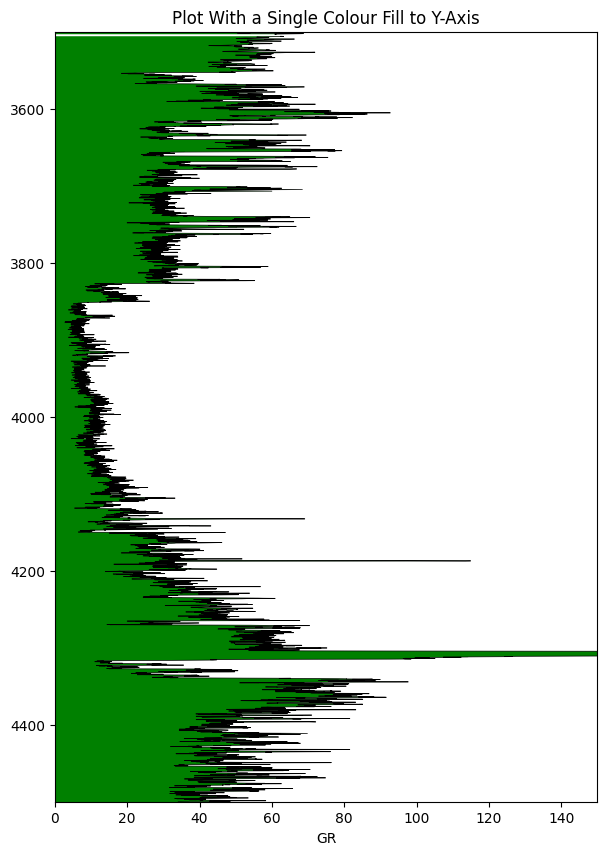

In [9]:
df.plot(x='GR', y='DEPTH', c='black', 
        lw=0.5, legend=False, figsize=(7,10))

plt.fill_betweenx(df['DEPTH'], df['GR'], 0, facecolor='green')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot With a Single Colour Fill to Y-Axis')
plt.show()

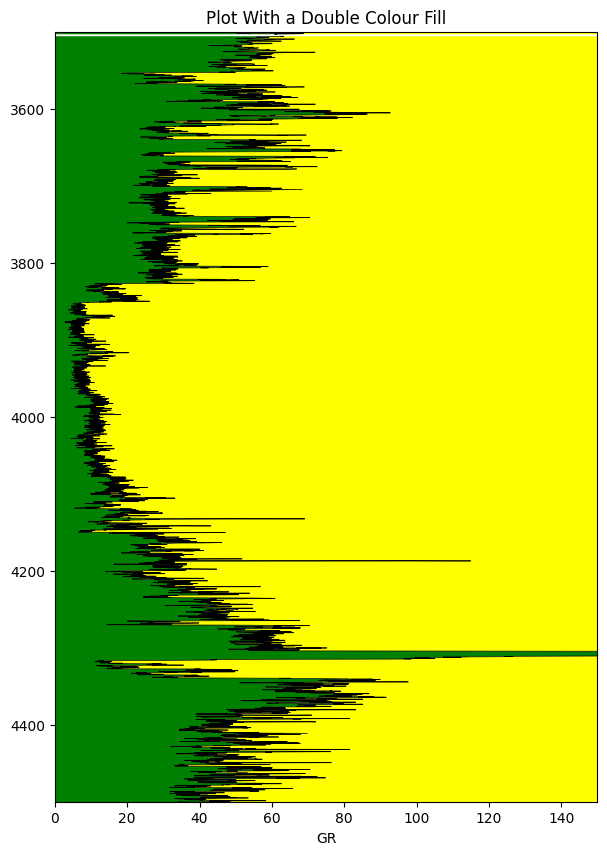

In [10]:
df.plot(x='GR', y='DEPTH', c='black', 
        lw=0.5, legend=False, figsize=(7,10))

plt.fill_betweenx(df['DEPTH'], df['GR'], 0, facecolor='green')
plt.fill_betweenx(df['DEPTH'], df['GR'], 150, facecolor='yellow')
plt.ylim(4500, 3500)
plt.xlim(0,150)
plt.title('Plot With a Double Colour Fill')
plt.show()

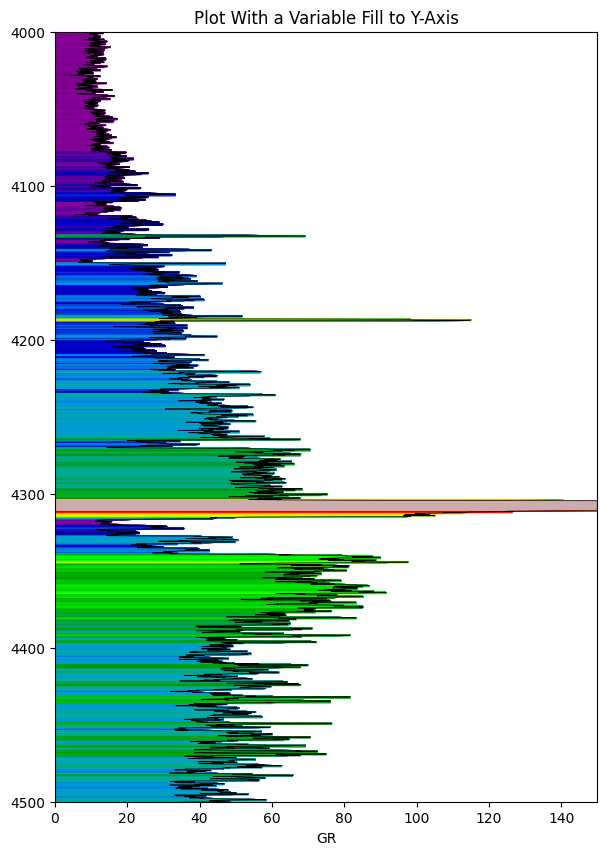

In [18]:
left_col_value = 0
right_col_value = 150

#assign the column to a variable for easier reading
curve = df['GR']

#calculate the span of values
span = abs(left_col_value - right_col_value)

#assign a color map
cmap = plt.get_cmap('nipy_spectral')

#create array of values to divide up the area under curve
color_index = np.arange(left_col_value, right_col_value, span / 100)

#setup the plot
df.plot(x='GR', y='DEPTH', c='black', lw=0.5, legend=False, figsize=(7,10))
plt.ylim(4500, 4000)
plt.xlim(left_col_value, right_col_value)
plt.title('Plot With a Variable Fill to Y-Axis')

#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(df['DEPTH'], 0 , curve, where = curve >= index,  color = color)

plt.show()


<ipython-input-19-70a40647a169>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)


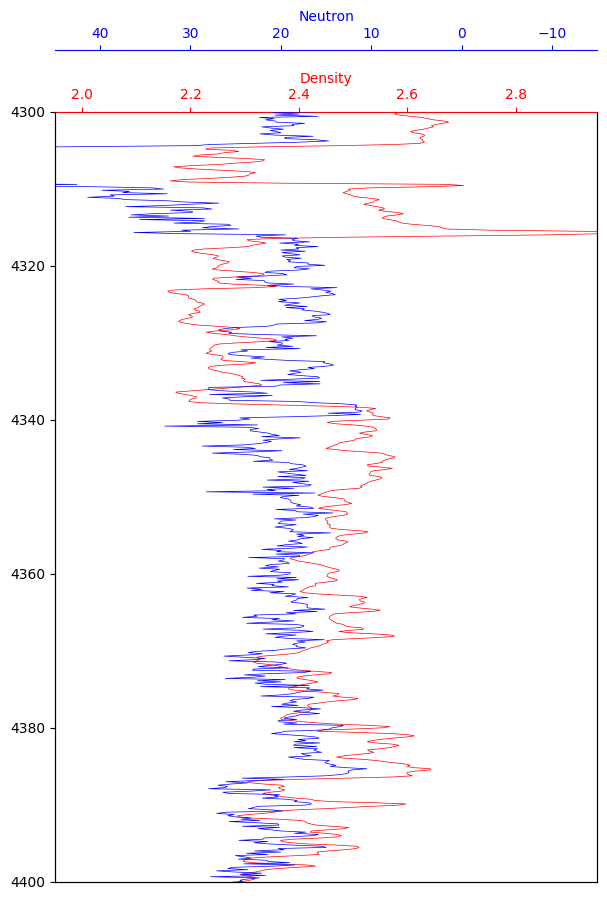

In [19]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DEN', 'DEPTH', data=df, color='red', lw=0.5)
ax1.set_xlim(1.95, 2.95)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('NEU', 'DEPTH', data=df, color='blue', lw=0.5)
ax2.set_xlim(45, -15)
ax2.set_xlabel('Neutron')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")


for ax in [ax1, ax2]:
    ax.set_ylim(4400, 4300)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
plt.show()

<ipython-input-20-a8c1dd46e5eb>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)


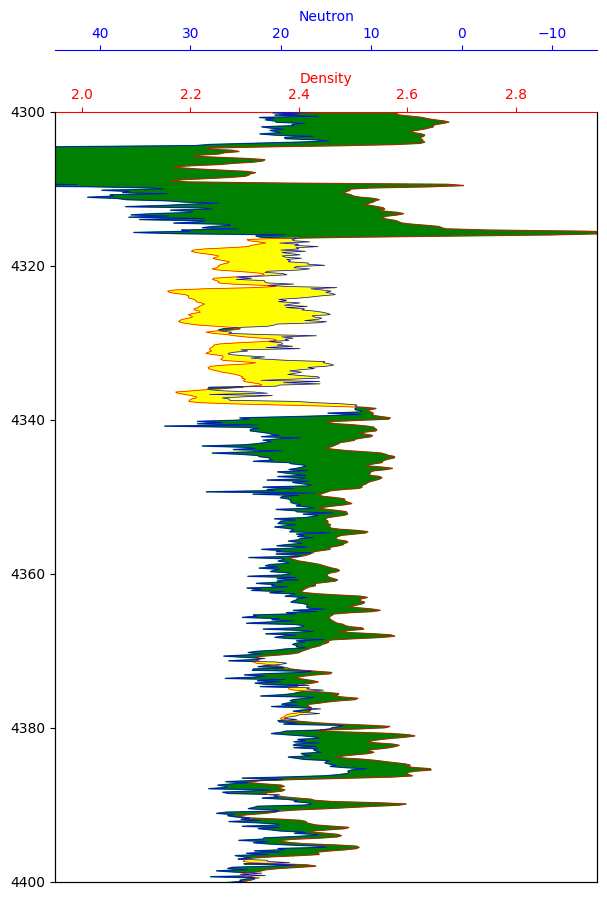

In [20]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DEN', 'DEPTH', data=df, color='red', lw=0.5)
ax1.set_xlim(1.95, 2.95)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('NEU', 'DEPTH', data=df, color='blue', lw=0.5)
ax2.set_xlim(45, -15)
ax2.set_xlabel('Neutron')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")

################################################################################
x1=df['DEN']
x2=df['NEU']

x = np.array(ax1.get_xlim())
z = np.array(ax2.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax1.fill_betweenx(df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax1.fill_betweenx(df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')
################################################################################


for ax in [ax1, ax2]:
    ax.set_ylim(4400, 4300)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")


Example 2 :

In [46]:
well = pd.read_csv('/content/L0509WellData.csv')

In [47]:
well

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,-999.000000,2.483700,0.018494,0.129119
1,4609.9008,90.721848,-999.000000,2.489308,0.013656,0.108034
2,4610.0008,90.709061,-999.000000,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343
...,...,...,...,...,...,...
1916,4801.4000,64.081604,62.997536,2.633956,-0.011572,0.098748
1917,4801.5000,56.813217,63.321045,2.630827,-0.016982,0.107114
1918,4801.6000,51.935394,63.320381,2.629536,-0.019666,0.114182
1919,4801.7000,49.111427,63.369019,2.629349,-0.020681,0.116993


<ipython-input-61-9e8ce3510977>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


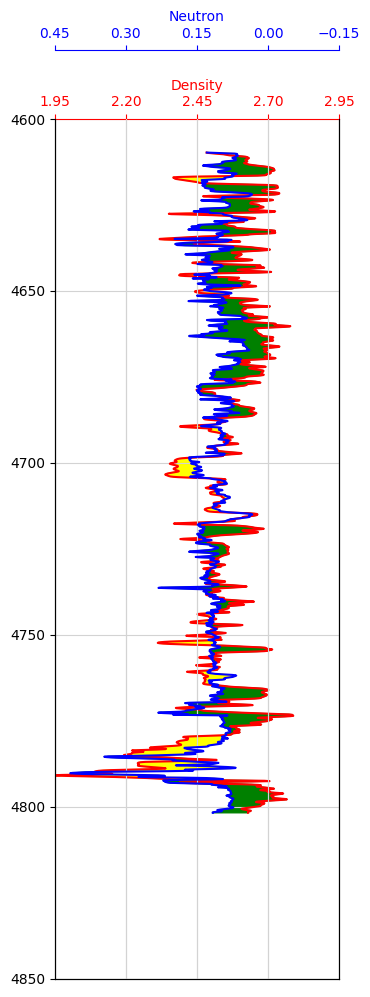

In [61]:
fig, ax = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = ax1.twiny() #Twins the y-axis for the density track with the neutron track




# Density track
ax1.plot("RHOB", "DEPTH", data = well, color = "red")
ax1.set_xlabel("Density")
ax1.set_xlim(1.95, 2.95)
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")
ax1.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])


# Neutron track placed ontop of density track
ax2.plot("NPHI", "DEPTH", data = well, color = "blue")
ax2.set_xlabel('Neutron')
ax2.xaxis.label.set_color("blue")
ax2.set_xlim(0.45, -0.15)
ax2.set_ylim(4850, 4600)
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.spines["top"].set_visible(True)
ax2.spines["top"].set_edgecolor("blue")
ax2.set_xticks([0.45, 0.3, 0.15,0, -0.15])
ax2.spines["top"].set_position(("axes", 1.08))




################################################################################
x1=well['RHOB']
x2=well['NPHI']

x = np.array(ax1.get_xlim())
z = np.array(ax2.get_xlim())

nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax1.fill_betweenx(well['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
ax1.fill_betweenx(well['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')
################################################################################

# a for loop. This saves repeating code.
for ax in [ax1, ax2]:
    ax.set_ylim(4850, 4600)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
    
plt.tight_layout()